# WIDELY USED DATA SET.
# REFERENCES USED FROM DIFFERENT SOURCES IN OPEN DOMAIN:
#PRIMARY REFERENCE:- https://medium.com/@rohanaggarwal45/thera-bank-case-with-univariate-as-well-as-bivariate-analysis-all-the-machine-learning-models-7f61d04eaa2a

# STEP:-1 Read the column description and ensure you understand each attribute well

# STEP:-2 Study the data distribution in each attribute, share your findings (15 Marks)

In [169]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [170]:
# LOAD AND REVIEW DATA
pdata= pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [171]:
# GET THE SHAPE OF THE DATA TO UNDERSTAND THE SIZE
pdata.shape

(5000, 14)

In [172]:
# CHECK THE FIRST FEW ROWS AND COLUMNS OF THE DATA-SET
pdata.head(10)
# FROM THE TABLE BELOW, IT CAN CLEARLY BE SEEN THAT THE FOLLOWING DISTRIBUTION OF VARIABLES OCCUR:
# A VERY USEFUL METHOD TO GENERATE REPORT SUMMARY IS AS BELOW
!pip install pandas_profiling
import pandas_profiling
pdata.profile_report()
# A COMPREHENSIVE DETAILED REPORT ABOUT THE DATA IS OUTPUT

In [173]:
#CHECK FOR ANY NULL VALUES IN THE DATA
pdata.isnull().values.any()
#SINCE THE RESULT IS FALSE IT LOOKS LIKE THERE ARE NO NULL VALUES
# ALSO FROM THE WARNINGS WE CAN SEE THAT ZEROS ARE PRESENT ONLY IN EXPERIENCE, CCavg And Mortgage WHICH IS ALSO ACCEPTABLE AS IT 
# IS A POSSIBLE SCENARIO

False

In [174]:
pdata.describe()

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

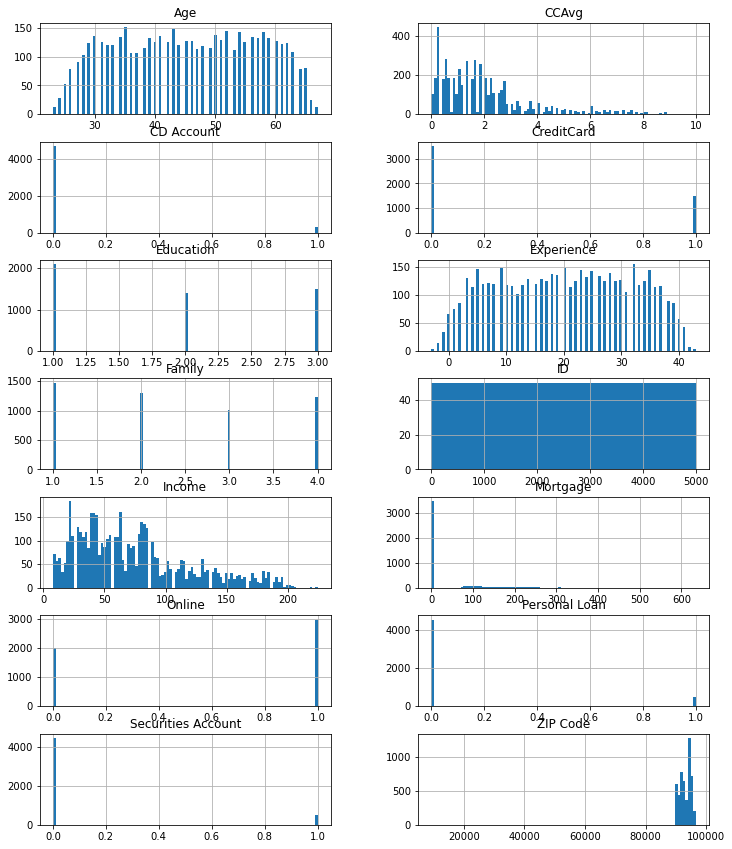

In [175]:
#JUST FOR HISTOGRAM PLOTS THE DATA IS STORED IN ANOTHER VARIABLE WITH THE OUTCOME VARIABLE and OTHER CATEGORICAL VARIABLES DROPPED
#pdata1=pdata.drop(['Personal Loan','Education','Experience','Family','Securities Account','Online','ZIP Code','CD Account','CreditCard'], axis=1)

pdata.hist(stacked=False,bins=100,figsize=(12,30),layout=(14,2));

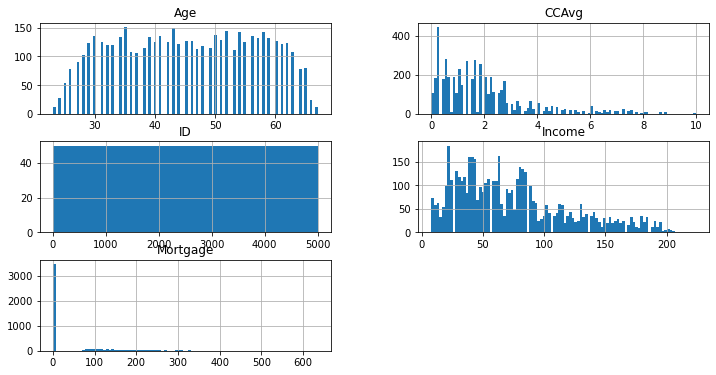

In [176]:
#JUST FOR HISTOGRAM PLOTS THE DATA IS STORED IN ANOTHER VARIABLE WITH THE OUTCOME VARIABLE and OTHER CATEGORICAL VARIABLES DROPPED
pdata1=pdata.drop(['Personal Loan','Education','Experience','Family','Securities Account','Online','ZIP Code','CD Account','CreditCard'], axis=1)

pdata1.hist(stacked=False,bins=100,figsize=(12,30),layout=(14,2));


In [177]:
# THE NEXT STEP IS TO IDENTIFY CORRELATION IN DATA, THIS IS AGAIN DONE BY DROPPING ONLY THE OUTPUT COLUMN IN THE DATASET
pdata2=pdata.drop(['Personal Loan'], axis=1)

pdata2.corr()
# HERE IN THE TABLE WE CAN ALREADY OBSERVE NUMERICALLY THAT EXPERIENCE HAS A HIGH CORRELATION WITH AGE WITH A CORRELATION VALUE
# OF 0.99

ID       Age  Experience    Income  ZIP Code  \
ID                  1.000000 -0.008473   -0.008326 -0.017695  0.013432   
Age                -0.008473  1.000000    0.994215 -0.055269 -0.029216   
Experience         -0.008326  0.994215    1.000000 -0.046574 -0.028626   
Income             -0.017695 -0.055269   -0.046574  1.000000 -0.016410   
ZIP Code            0.013432 -0.029216   -0.028626 -0.016410  1.000000   
Family             -0.016797 -0.046418   -0.052563 -0.157501  0.011778   
CCAvg              -0.024675 -0.052012   -0.050077  0.645984 -0.004061   
Education           0.021463  0.041334    0.013152 -0.187524 -0.017377   
Mortgage           -0.013920 -0.012539   -0.010582  0.206806  0.007383   
Securities Account -0.016972 -0.000436   -0.001232 -0.002616  0.004704   
CD Account         -0.006909  0.008043    0.010353  0.169738  0.019972   
Online             -0.002528  0.013702    0.013898  0.014206  0.016990   
CreditCard          0.017028  0.007681    0.008967 -0.002385  0.007691   

                      Family     CCAvg  Education  Mortgage  \
ID                 -0.016797 -0.024675   0.021463 -0.013920   
Age                -0.046418 -0.052012   0.041334 -0.012539   
Experience         -0.052563 -0.050077   0.013152 -0.010582   
Income             -0.157501  0.645984  -0.187524  0.206806   
ZIP Code            0.011778 -0.004061  -0.017377  0.007383   
Family              1.000000 -0.109275   0.064929 -0.020445   
CCAvg              -0.109275  1.000000  -0.136124  0.109905   
Education           0.064929 -0.136124   1.000000 -0.033327   
Mortgage           -0.020445  0.109905  -0.033327  1.000000   
Securities Account  0.019994  0.015086  -0.010812 -0.005411   
CD Account          0.014110  0.136534   0.013934  0.089311   
Online              0.010354 -0.003611  -0.015004 -0.005995   
CreditCard          0.011588 -0.006689  -0.011014 -0.007231   

                    Securities Account  CD Account    Online  CreditCard  
ID                           -0.016972   -0.006909 -0.002528    0.017028  
Age                          -0.000436    0.008043  0.013702    0.007681  
Experience                   -0.001232    0.010353  0.013898    0.008967  
Income                       -0.002616    0.169738  0.014206   -0.002385  
ZIP Code                      0.004704    0.019972  0.016990    0.007691  
Family                        0.019994    0.014110  0.010354    0.011588  
CCAvg                         0.015086    0.136534 -0.003611   -0.006689  
Education                    -0.010812    0.013934 -0.015004   -0.011014  
Mortgage                     -0.005411    0.089311 -0.005995   -0.007231  
Securities Account            1.000000    0.317034  0.012627   -0.015028  
CD Account                    0.317034    1.000000  0.175880    0.278644  
Online                        0.012627    0.175880  1.000000    0.004210  
CreditCard                   -0.015028    0.278644  0.004210    1.000000

In [178]:
def plot_corr(df, size=20):
    corr=df.corr()
    fig, ax= plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)

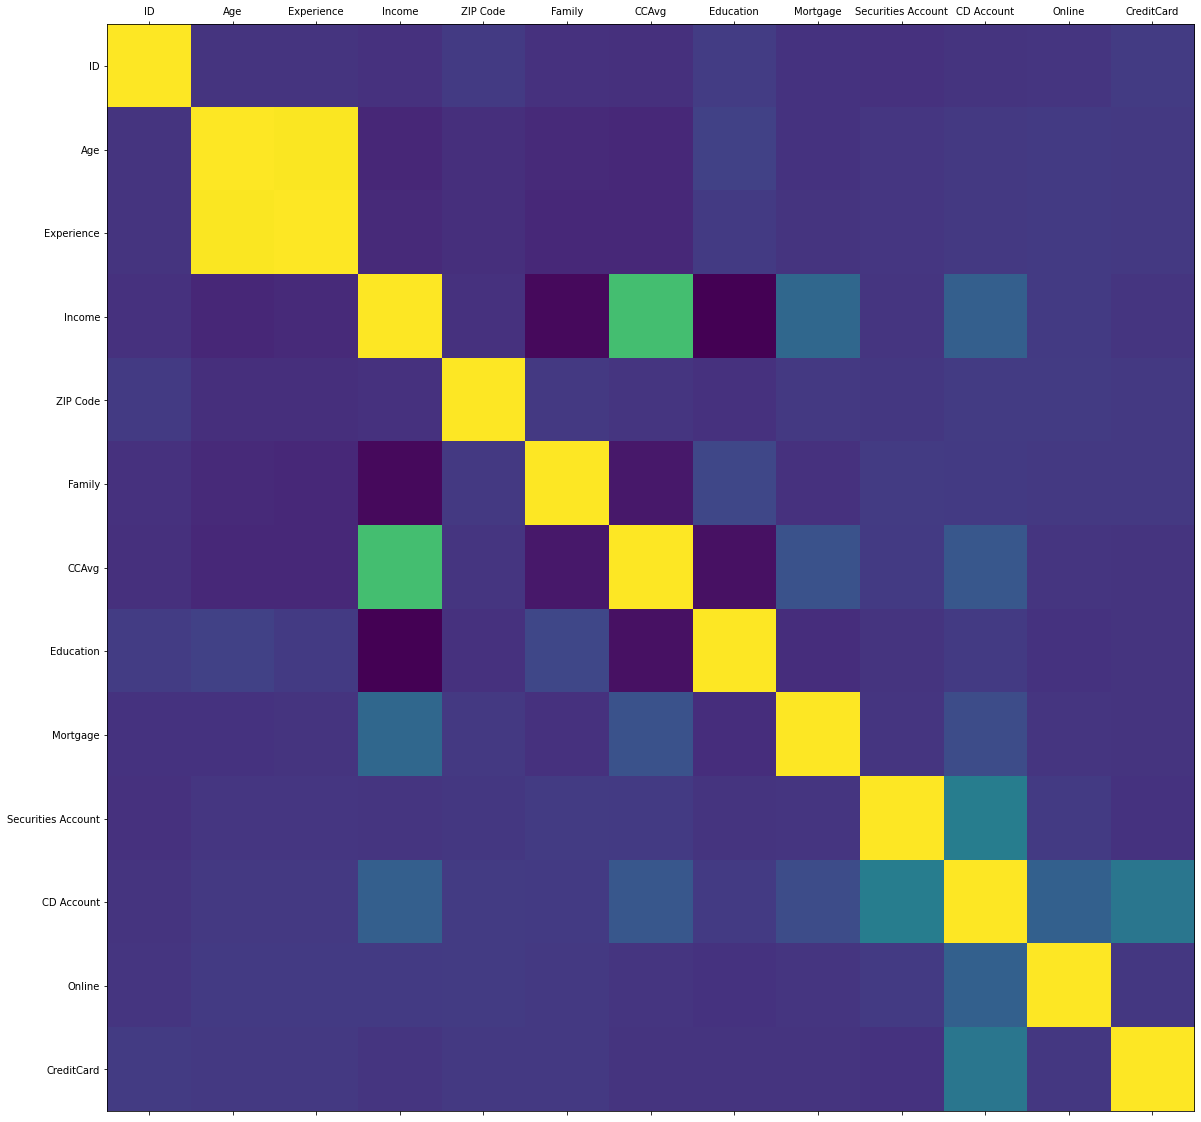

In [179]:
# THIS STEP IS DONE TO VISUALIZE THE CORRELAITONS IN AN GRAPHICAL MANNER
plot_corr(pdata2)
# AGAIN WE OBSERVE THAT THE EXPERIENCE IS HIGHLY CORRELATED WITH AGE, SO IN THIS CASE WE CAN DROP EXPERIENCE AND i

C:\Users\VISNN\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\VISNN\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\VISNN\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


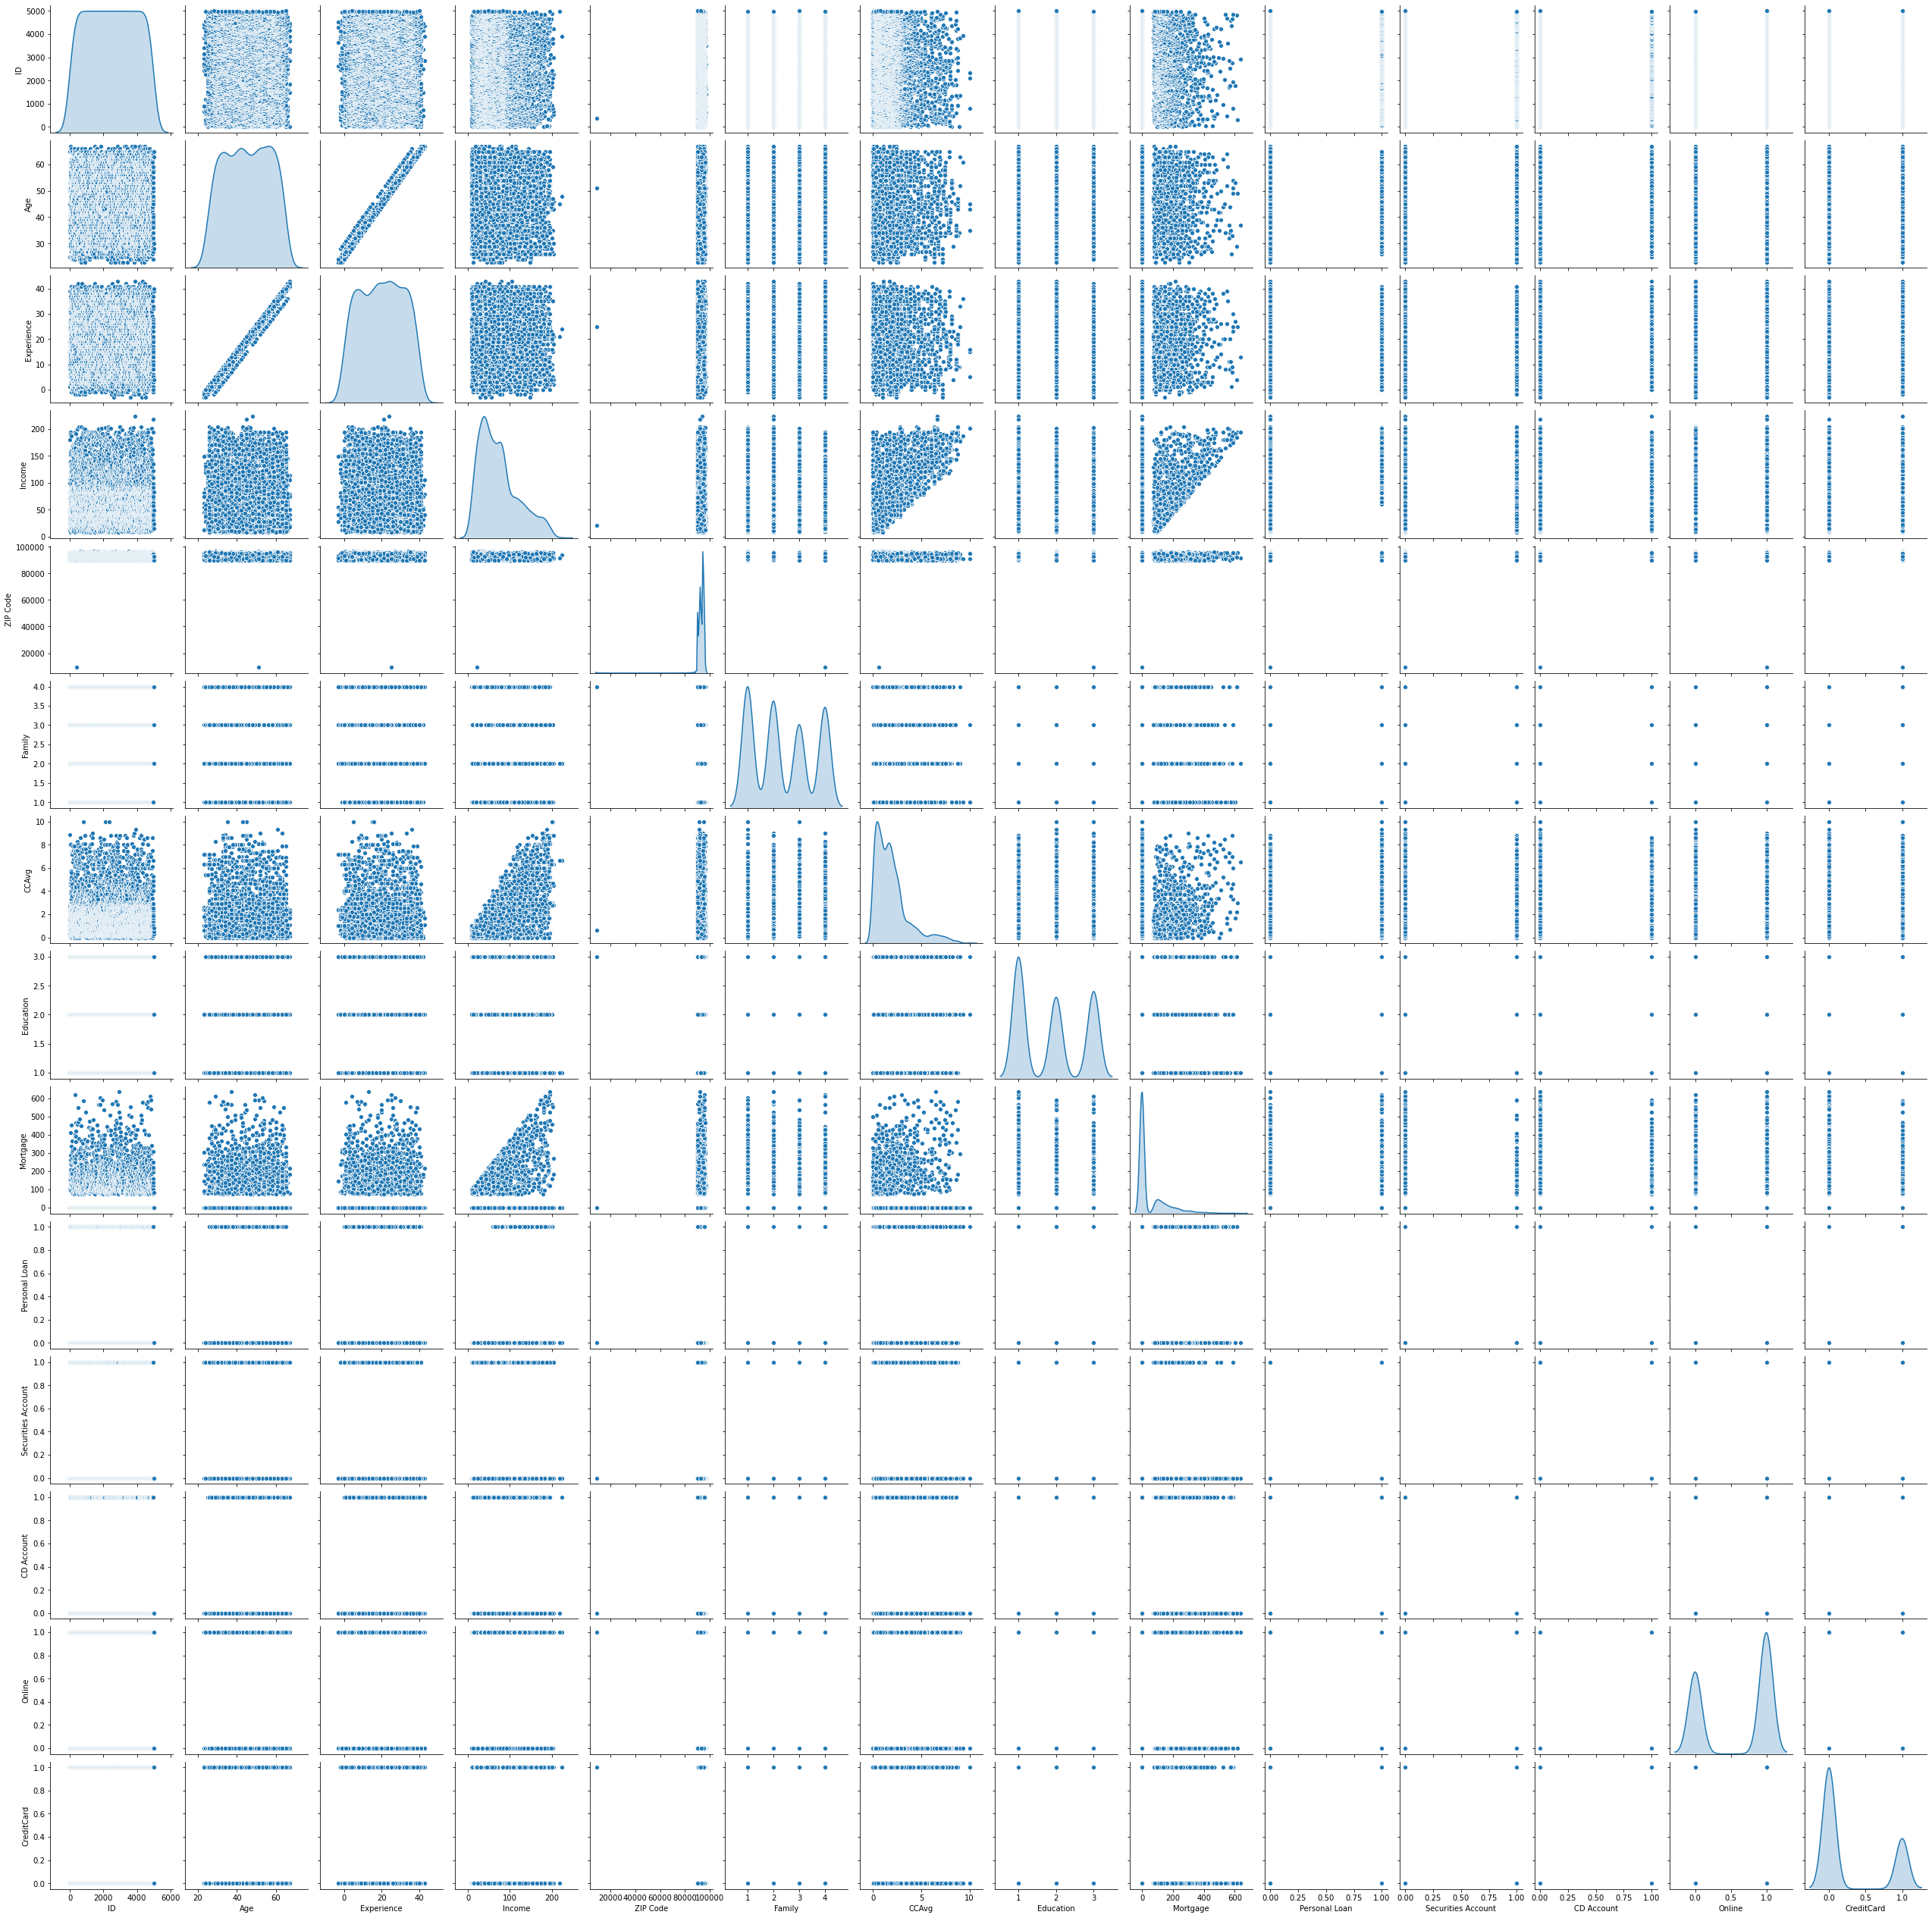

In [180]:
# PLOTTING THE COMPLETE DATASET INCLUDING CATEGORICAL VARIABLES, SHOWS TOO MUCH INFORMATION WITHOUT ANY USE
sns.pairplot(pdata,diag_kind='kde')

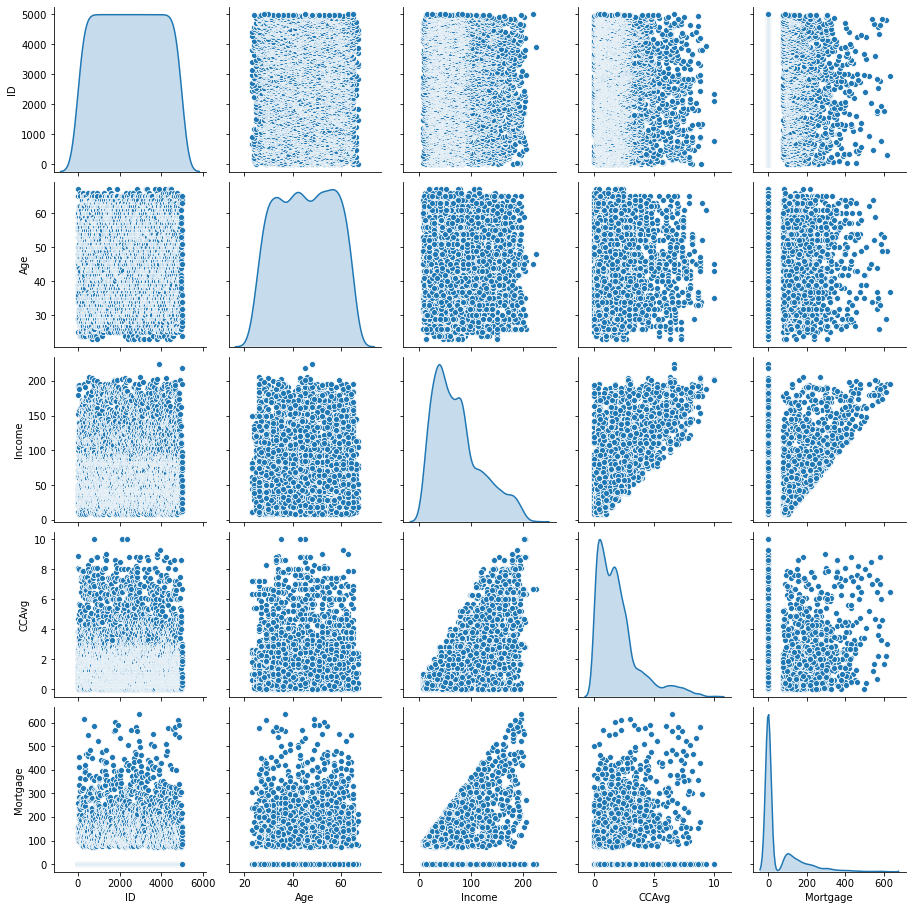

In [181]:
# PLOTTING THE COMPLETE DATASET AFTER DROPPING THE CATEGORICAL VARIABLES- LOT MORE EASIER TO UNDERSTAND
sns.pairplot(pdata1,diag_kind='kde')
# ALSO SHOWS THAT MORTGAGE HAS A SPIKE IN THE DATA SIMILAR TO AN OUTLIER

EDUCATION VS PERSONAL LOAN ( EXAMINATION OF CATEGORICAL VARIABLES ON PERSONAL LOAN)

cross tabulation can be given as: 
 Personal Loan     0    1
Education               
1              2003   93
2              1221  182
3              1296  205


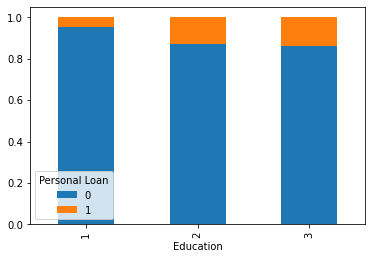

In [182]:
# NOW I AM GOING TO USE THE CROSS-TAB FUNCTION IN ORDER TO EXAMINE THE DISTRIBUTION 
# OF EACH CATEGORICAL VARIABLE ON THE TARGET VARIABLE , for example what percent of graduates have 
#availed personal loans etc

edu=pd.crosstab(pdata['Education'],pdata['Personal Loan'])
edu.div(edu.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as:','\n',edu)

FAMILY VS PERSONAL LOAN

cross tabulation can be given as: 
 Personal Loan     0    1
Family                  
1              1365  107
2              1190  106
3               877  133
4              1088  134


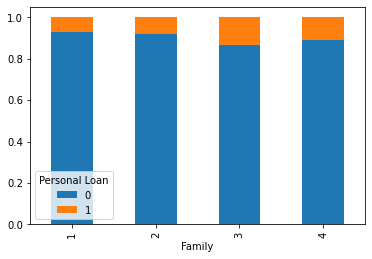

In [183]:
edu=pd.crosstab(pdata['Family'],pdata['Personal Loan'])
edu.div(edu.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as:','\n',edu)
# AS CAN BE SEEN THE EFFECT OF FAMILY SIZE IS NOT AS MUCH AN IMPORTANT FACTOR 
#DECIDING IF THE PERSONAL LOAN IS SANCTIONED

EXAMINATION OF BOOLEAN VARIABLES ON THE TARGET VARIABLE

CD_ACCOUNT vs PERSONAL LOAN

In [184]:
pdata.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

cross tabulation can be given as: 
 Personal Loan     0    1
CD Account              
0              4358  340
1               162  140


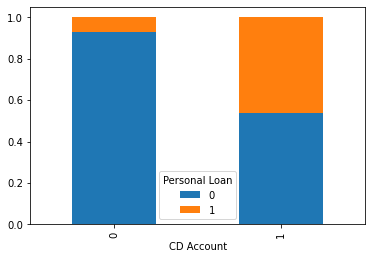

In [185]:
edu=pd.crosstab(pdata['CD Account'],pdata['Personal Loan'])
edu.div(edu.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as:','\n',edu)
# AS CAN BE SEEN THE EFFECT OF CD ACCOUNT IS SHOWN BELOW, THOSE HAVING CD ACCOUNT 
# HAVE MORE CHANCES OF AVAILING THE PERSONAL LOAN

ONLINE vs PERSONAL LOAN

cross tabulation can be given as: 
 Personal Loan     0    1
Online                  
0              1827  189
1              2693  291


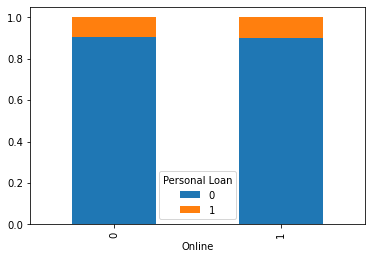

In [186]:
edu=pd.crosstab(pdata['Online'],pdata['Personal Loan'])
edu.div(edu.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as:','\n',edu)
# AS CAN BE SEEN THE EFFECT OF CREDIT CARD IS SHOWN BELOW, THOSE HAVING 
# ONLINE BANKING IS NOT HAVING ANY EFFECT ON PERSONAL LOAN

Securities_Account vs Personal Loan

cross tabulation can be given as: 
 Personal Loan          0    1
Securities Account           
0                   4058  420
1                    462   60


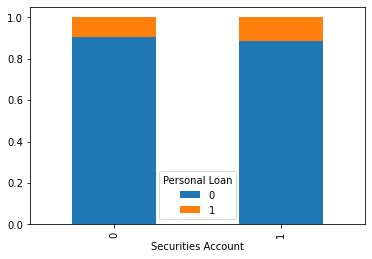

In [187]:
edu=pd.crosstab(pdata['Securities Account'],pdata['Personal Loan'])
edu.div(edu.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as:','\n',edu)
# AS CAN BE SEEN THE EFFECT OF CREDIT CARD IS SHOWN BELOW, THOSE HAVING 
# Securities Account IS NOT HAVING ANY EFFECT ON PERSONAL LOAN

Numerical Variables vs Personal Data

Text(0, 0.5, 'Age')

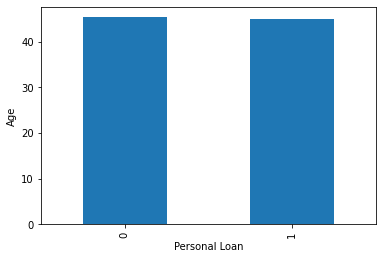

In [188]:
# WE WILL TRY TO LOOK AT THE MEAN OF THE NUMERIC INDEPENDENT VARIABLE AND THEN 
# COMPARE IT WITH THE TARGET VARIABLE BY USING THE GROUPBY FUNCTION
ax1=pdata.groupby('Personal Loan')['Age'].mean().plot(kind='bar')
ax1.set_ylabel('Age')
# WHAT IS HAPPENING IN THE BELOW PLOT IS THAT THE Y-AXIS CONSISTS OF THE MEAN AGE
# OF THE CUSOTMERS AND IT IS PLOTTED AGAINST THE PEOPLE WHO HAVE AND HAVE NOT AVAILED
# THE PERSONAL LOAN AND AS CAN SEEN , WE DO NOT SEE ANY MAJOR CHANGE IN MEAN AGE.
# WE MAY HAVE TO BREAK THE AGES IN TO BINS AND THEN REVIEW THE DATA AGAIN.


In [189]:
# BREAK THE AGE DATA SET IN TO SEVERAL BINS/CATEGORIES
#bins = [25,35,45,55,65] # from pdata.describe() we can get the range of the age of the people and then 
#suitably arrange the bins
#pdata_age=pdata
#group = ['Very Young','Youth','middleage','oldage']
#pdata_age['Age_bin']=pd.cut(pdata_age['Age'],bins,labels=group)
#age=pd.crosstab(pdata_age['Age_bin'],pdata_age['Personal Loan'])
#age.div(age.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
# As can be seen below the age distribution does not affect the personal loan distribution
# PLEASE NOTE THAT AS AGE AND EXPERIENCE ARE CLOSELY CORRELATED WE CAN EXPECT 
# THE SAME RESULTS.
pdata.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

RELATION BETWEEN CREDIT CARD  USAGE AND PERSONAL LOAN

Text(0, 0.5, 'Credit Card Spending')

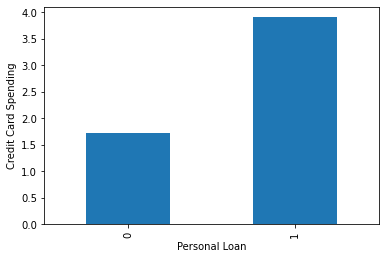

In [190]:
ax1=pdata.groupby('Personal Loan')['CCAvg'].mean().plot(kind='bar')
ax1.set_ylabel('Credit Card Spending')
# AS CAN BE SEEN FROM THE BAR PLOT BELOW HIGHER THE CREDIT CARD SPENDING 
# MORE LIKELY IS THE PERSONAL LOAN AVAILING

INCOME VS PERSONAL LOAN

Text(0, 0.5, 'Income')

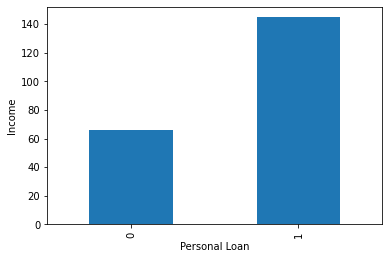

In [191]:
ax=pdata.groupby('Personal Loan')['Income']
ax1=ax.mean().plot(y='Income',kind='bar')
ax1.set_ylabel('Income')
# AS CAN BE SEEN FROM THE PLOT BELOW MORE PEOPLE WITH HIGHER INCOME AVAIL THE 
# PERSONAL LOAN WHICH IS TO BE EXPECTED

C:\Users\VISNN\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\VISNN\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\VISNN\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\VISNN\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


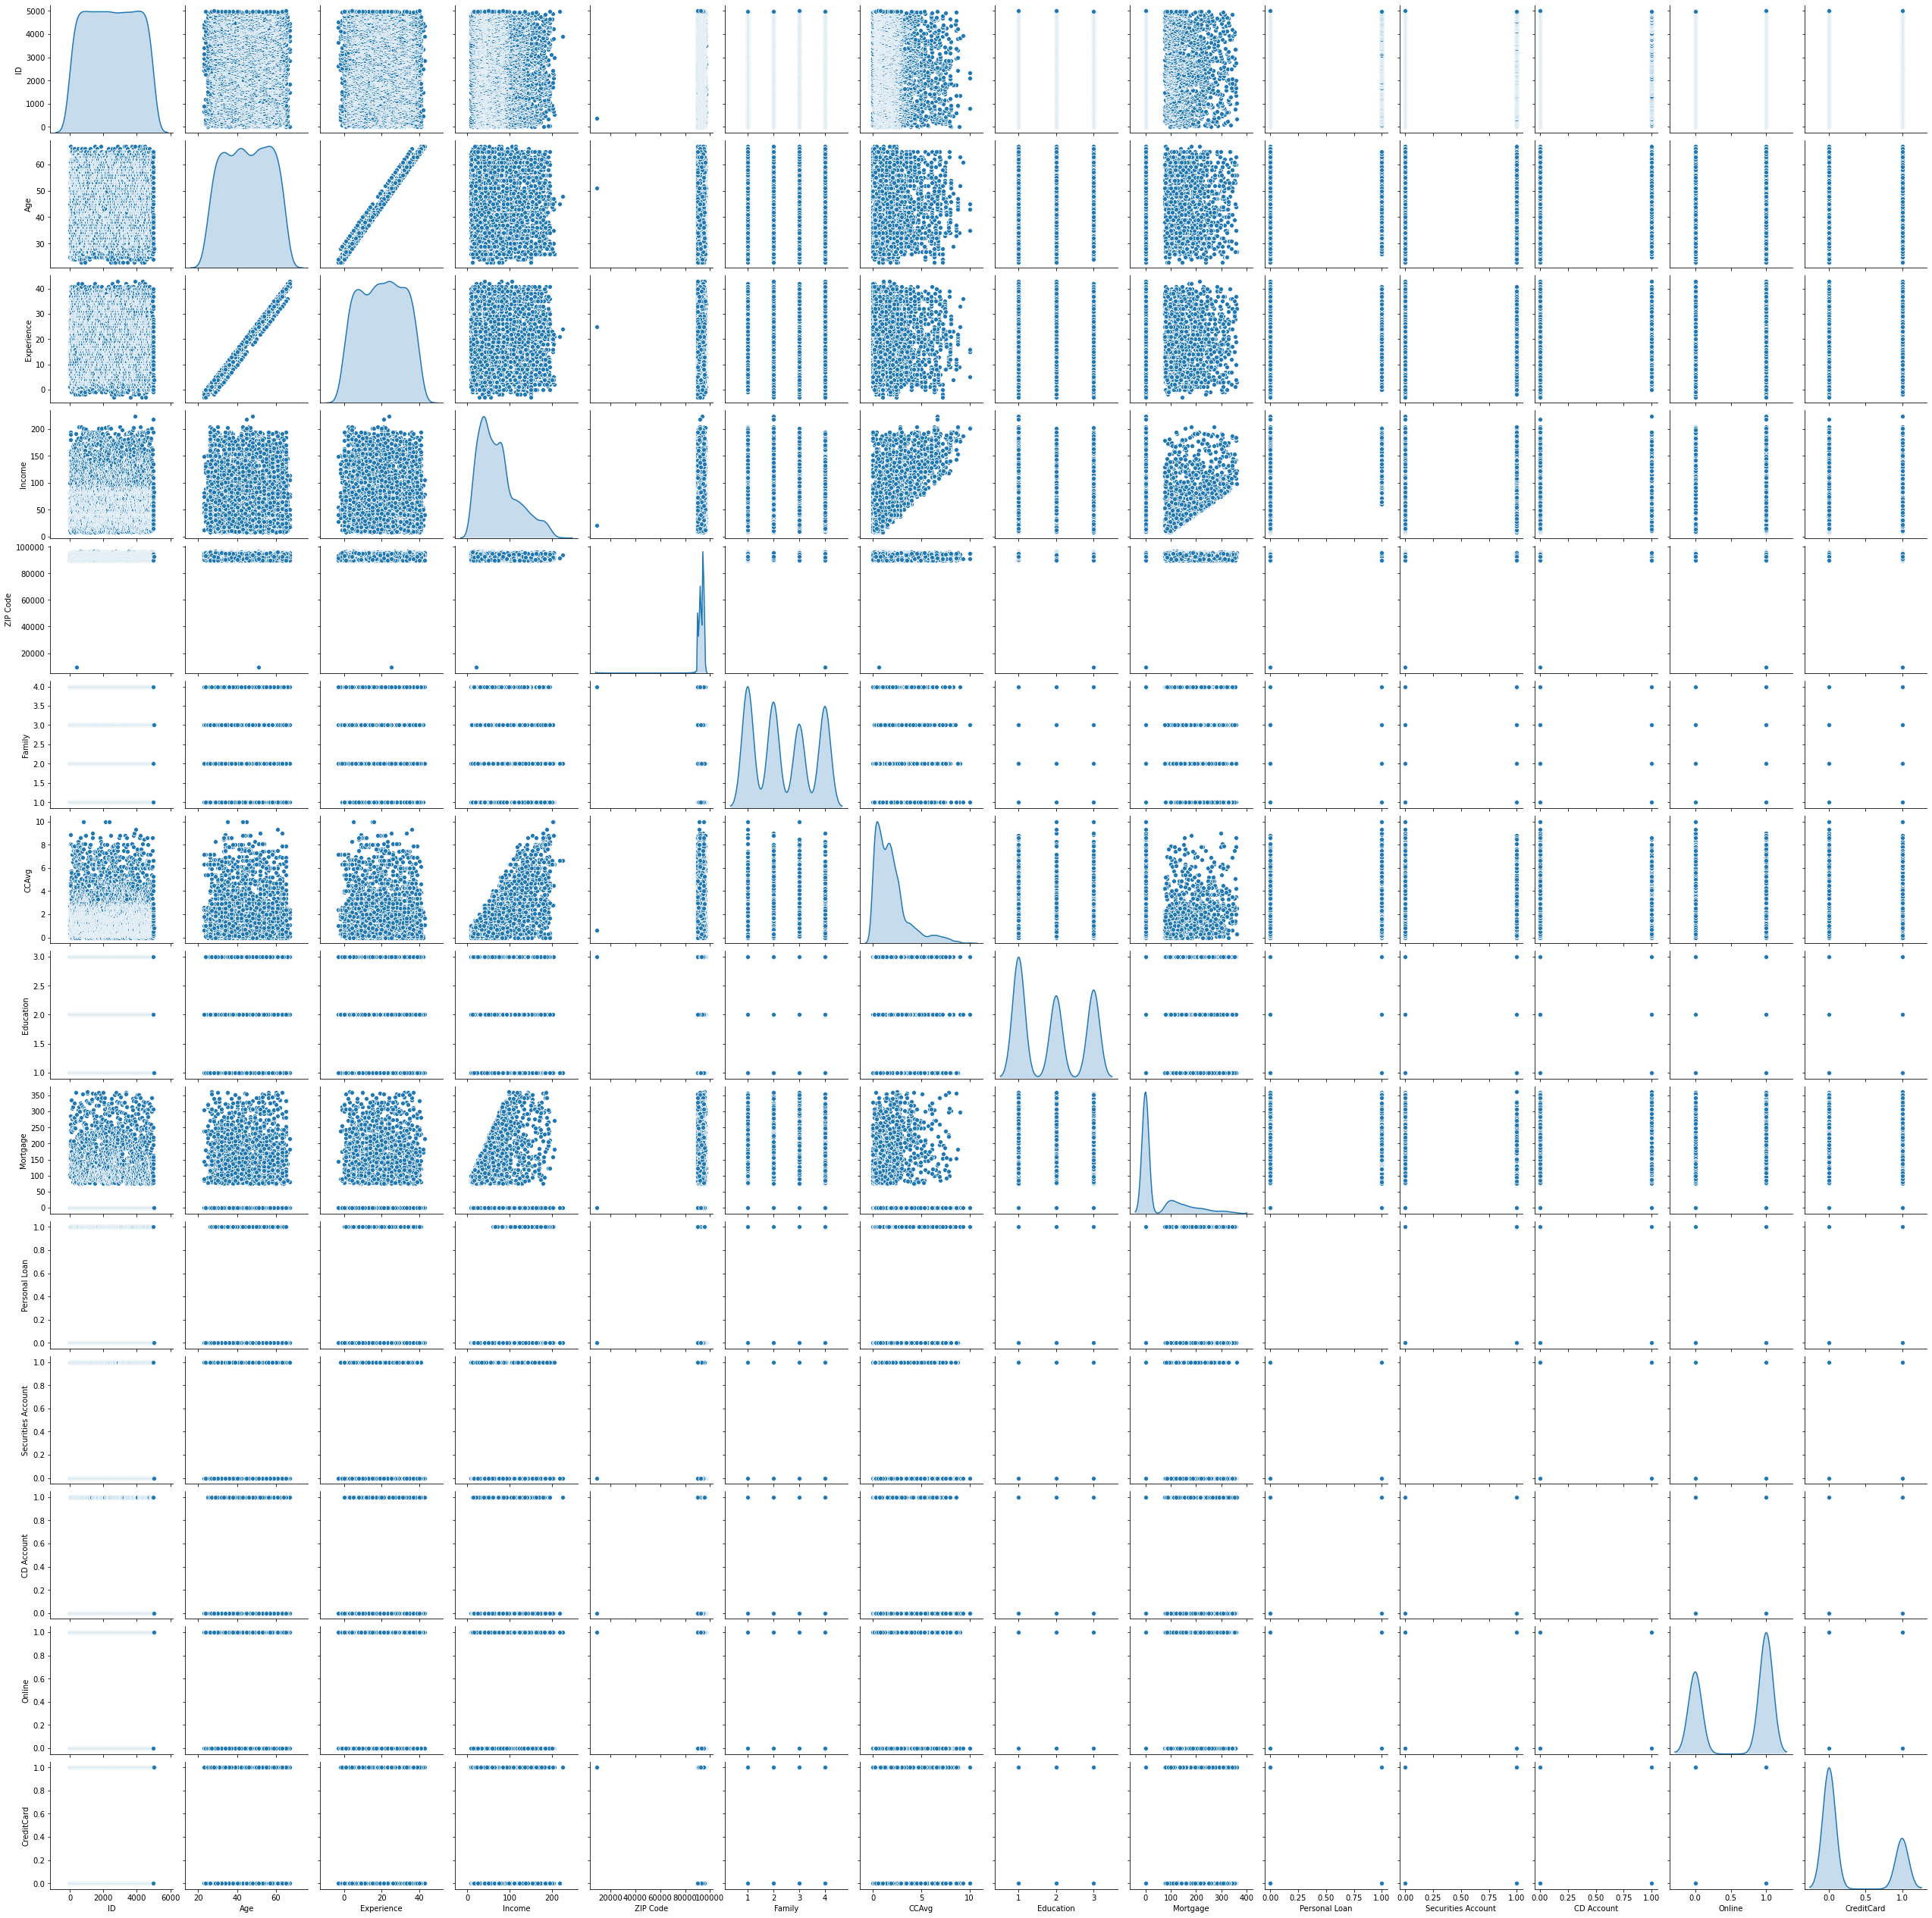

In [192]:
# OUTLIER EVALUATION IN THE MORTGAGE VARIABLE
# AS WE HAD DESCRIBED IN THE PAIR PLOT AND THE DESCRIBE FUNCTION THE MORTGAGE 
# VARIABLE HAS OUTLIERS IN THE DATA DISTRIBUTION
# THE APPROACH TAKEN HERE IS THAT THE ROWS WITH MORTGAGE VARIABLE WITH Z SCORE
# LESS THAN 3 IS TAKEN.

from scipy import stats
pdata['Mortgage_zscore']=np.abs(stats.zscore(pdata['Mortgage']))
pdata3=pdata[pdata['Mortgage_zscore']<3]
pdata3.drop('Mortgage_zscore',axis=1,inplace=True)
pdata3.shape
sns.pairplot(pdata3,diag_kind='kde')
# NOW NOTE THAT THE HIGHEST VALUE OF THE OUTLIER EEARLIER WAS AROUND 600 AND IT IS NOW 300 SO THE EFFECT OF THE OUTLIER IS BEING MINIMIZED

# STEP:3 Get the target column distribution. Your comments (5 marks)

In [193]:
# NOW WE WILL TRY TO SEE HOW MANY PEOPLE HAVE AVAILED PERSONAL LOAN IN THE 
# PRESENT DATA SET
n_personal_loan_takers=len(pdata.loc[pdata['Personal Loan']==1])
n_personal_loan_non_takers=len(pdata.loc[pdata['Personal Loan']==0])
print("The Number of people who have availed Personal Loans:{0} ({1:2.2f}%)".format(n_personal_loan_takers,(n_personal_loan_takers/(n_personal_loan_takers + n_personal_loan_non_takers))*100 ))
print("The Number of people who have not availed Personal Loans:{0} ({1:2.2f}%)".format(n_personal_loan_non_takers,(n_personal_loan_non_takers/(n_personal_loan_takers + n_personal_loan_non_takers))*100 ))

The Number of people who have availed Personal Loans:480 (9.60%)
The Number of people who have not availed Personal Loans:4520 (90.40%)


AS CAN BE SEEN ABOUT 10% OF THE PEOPLE HAVE TAKEN PERSONAL LOANS AND ABOUT 90% HAVE NOT AVAILED IT

# STEP:4  Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [194]:
# BEFORE PROCEEDING IT IS IMPORTANT TO DROP THE FOLLOWING VARIABLES FROM THE DATA SET
# 1.) EXPERIENCE- THIS VARIABLE IS SHOWING HIGH CORRELATION WITH AGE AND HENCE CAN BE DROPPED
# 2.) ID - THIS IS DATA WITH UNIQUE VALUE AND JUST REPRESENTS SERIAL NUMBER
# 3.) zIP CODE - ALSO A CATEGORICAL VARIABLE REPRESENTING A SERIAL NUMBER

# NOTE THAT WE ARE NOW USING THE DATA SET PDATA3 WHEREIN OUTLIERS ARE TAKEN CARE OF
pdata4=pdata3.drop(['Experience','ZIP Code','ID'], axis=1)
pdata4.head()

Age  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25      49       4    1.6          1         0              0   
1   45      34       3    1.5          1         0              0   
2   39      11       1    1.0          1         0              0   
3   35     100       1    2.7          2         0              0   
4   35      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

In [195]:
from sklearn.model_selection import train_test_split
X=pdata4.drop('Personal Loan',axis=1) # Dropping the dependent variable and keeping all the 
Y= pdata4['Personal Loan'] # PREDICTED CLASS (1= LOAN AVAILED AND 0= LOAN NOT AVAILED)
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.3,random_state=1)
x_train.head(10)
y_train.head(10)

3402    0
4688    0
4505    0
2238    0
3       0
4974    0
3004    0
7       0
3249    0
2580    0
Name: Personal Loan, dtype: int64

In [196]:
# CHECKING THE SPLIT OF THE DATA

In [197]:
print("{0:0.2f}%  data is in the training set".format((len(x_train)/len(pdata4.index))*100))
print("{0:0.2f}%  data is in the testing set".format((len(x_test)/len(pdata4.index))*100))

69.99%  data is in the training set
30.01%  data is in the testing set


In [198]:
#  NOW WE HAVE TO CHECK THE SPLIT OF THE DATA ( THOSE WHO HAVE AVAILED AS COMPARED TO THOSE WHO HAVE NOT) IN THE TESTING AND
# TRAINING SET

In [199]:
# NOW WE WILL TRY TO SEE HOW MANY PEOPLE HAVE AVAILED PERSONAL LOAN IN THE 
# PRESENT DATA SET
n_personal_loan_takers=len(pdata.loc[pdata['Personal Loan']==1])
n_personal_loan_non_takers=len(pdata.loc[pdata['Personal Loan']==0])
print("ORIGINAL DATASET- who have availed Personal Loans:{0} ({1:2.2f}%)".format(n_personal_loan_takers,(n_personal_loan_takers/(n_personal_loan_takers + n_personal_loan_non_takers))*100 ))
print("ORIGINAL DATASET who have not availed Personal Loans:{0} ({1:2.2f}%)".format(n_personal_loan_non_takers,(n_personal_loan_non_takers/(n_personal_loan_takers + n_personal_loan_non_takers))*100 ))
print("")
###########TRAINING DATASET#####################
n_personal_loan_takers_Training=len(y_train[y_train[:]==1])
n_personal_loan_non_takers_Training=len(y_train[y_train[:]==0])
print("TRAINING DATASET- who have availed Personal Loans:{0} ({1:2.2f}%)".format(n_personal_loan_takers_Training,(n_personal_loan_takers_Training/(n_personal_loan_takers_Training + n_personal_loan_non_takers_Training))*100 ))
print("TRAINING DATASET who have not availed Personal Loans:{0} ({1:2.2f}%)".format(n_personal_loan_non_takers_Training,(n_personal_loan_non_takers_Training/(n_personal_loan_takers_Training + n_personal_loan_non_takers_Training))*100 ))
print("")
###########TESTING DATASET#####################
n_personal_loan_takers_Testing=len(y_test[y_test[:]==1])
n_personal_loan_non_takers_Testing=len(y_test[y_test[:]==0])
print("TESTING DATASET- who have availed Personal Loans:{0} ({1:2.2f}%)".format(n_personal_loan_takers_Testing,(n_personal_loan_takers_Testing/(n_personal_loan_takers_Testing + n_personal_loan_non_takers_Testing))*100 ))
print("TESTING DATASET who have not availed Personal Loans:{0} ({1:2.2f}%)".format(n_personal_loan_non_takers_Testing,(n_personal_loan_non_takers_Testing/(n_personal_loan_takers_Testing + n_personal_loan_non_takers_Testing))*100 ))
print("")

ORIGINAL DATASET- who have availed Personal Loans:480 (9.60%)
ORIGINAL DATASET who have not availed Personal Loans:4520 (90.40%)

TRAINING DATASET- who have availed Personal Loans:305 (8.90%)
TRAINING DATASET who have not availed Personal Loans:3121 (91.10%)

TESTING DATASET- who have availed Personal Loans:128 (8.71%)
TESTING DATASET who have not availed Personal Loans:1341 (91.29%)



In [200]:
# AS CAN BE SEEN CLEARLY, THE SPLIT B/W THE LOAN TAKERS AND NON LOAN TAKERS IN  THE TRAINING AND TESTING DATASET ARE ALSO KEPT
# THE SAME.

# STEP 5  : Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans (15 marks)

# STEP 6: Print the confusion matrix for all the above models (5 marks)

# LOGISTIC REGRESSION

In [201]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
# Fit the model on train
model= LogisticRegression(solver="liblinear")
model.fit(x_train,y_train)
#Predict on Test
y_predict = model.predict(x_test)

coef_df=pd.DataFrame(model.coef_) # converts the coefficient matrix in to a dataframe
coef_df['intercept']=model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.018954  0.043385  0.377656  0.067444  1.214757  0.000544 -0.687622   

          7         8         9  intercept  
0  2.945151 -0.551752 -0.813984  -9.136125  


In [202]:
#EVALUATE MODEL SCORE - TEST SCORE
model_score = model.score(x_test,y_test)
print(model_score)

0.9475833900612661


In [203]:
# The model score on test data is close to 95% which is very good.

# CONFUSION MATRIX- LOGISTIC REGRESSION

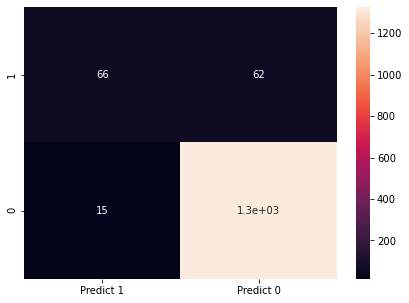

In [204]:
cm=metrics.confusion_matrix(y_test,y_predict,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],
                  columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)

In [205]:
#THE CONFUSION MATRIX FOR LOGISTIC REGRESSION IS SHOWN AS ABOVE:
#TRUE POSITIVES (TP): THE MODEL CORRECTLY PREDICTED THAT 66 PEOPLE WILL AVAIL THE PERSONAL LOAN
#TRUE NEGATIVES (TN): THE MODEL CORRECTLY PREDICTED THAT 1300 PEOPLE WILL NOT AVAIL THE PERSONAL LOAN
#FALSE POSITIVE (FP): THE MODEL PREDICTED THAT 15 PEOPLE WILL AVAIL LOAN BUT THEY DID NOT - TYPE I ERROR
#FALSE NEGATIVE (FN): THE MODEL PREDICTED THAT 62 PEOPLE WILL NOT AVAIL THE LOAN BUT THEY DID END UP AVAILING THE PERSONAL LOAN - TYPE -II ERROR ( MORE IMPORTANT IN THIS CASE)

In [206]:
#EVALUATION OF THE LOGISTIC REGRESSION MODEL
print("Classification Report")
print (metrics.classification_report(y_test,y_predict,labels=[1,0]))

Classification Report
              precision    recall  f1-score   support

           1       0.81      0.52      0.63       128
           0       0.96      0.99      0.97      1341

    accuracy                           0.95      1469
   macro avg       0.89      0.75      0.80      1469
weighted avg       0.94      0.95      0.94      1469



In [207]:
# AS CAN BE SEEN ABOVE THE PRECISION IS ABOUT 81% AND RECALL IS ABOUT 52%
# WHICH MEANS THAT OUT OF 100 POSITIVE IDENTITIFICATION, WE CAN BE SURE THAT 81 TIMES WE GOT THE RIGHT PERSON WHO CAN AVAIL THE LOAN
# NOW WE ARE ABOUT 52% ACCURATE IN IDENTIFYING THE PEOPLE LIKELY IN AVAILING THE LOAN.
# SUPPORT FOR 1 IS 128 WHICH MEANS , 128 PEOPLE ARE LIKELY TO AVAIL THE PERSONAL LOAN

# NAIVE BAYES ALGORITHM

In [208]:
# SPLIT DATA
from sklearn.model_selection import train_test_split
X=pdata4.drop('Personal Loan',axis=1) # Dropping the dependent variable and keeping all the 
Y= pdata4['Personal Loan'] # PREDICTED CLASS (1= LOAN AVAILED AND 0= LOAN NOT AVAILED)
x_train1,x_test1,y_train1,y_test1=train_test_split(X,Y, test_size=0.3,random_state=1)
x_train1.head(10)
y_train1.head(10)

3402    0
4688    0
4505    0
2238    0
3       0
4974    0
3004    0
7       0
3249    0
2580    0
Name: Personal Loan, dtype: int64

In [209]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes 
#create the model
Personal_Loan_Model=GaussianNB()
Personal_Loan_Model.fit(x_train1,y_train1.ravel())

GaussianNB()

PERFORMANCE OF OUR MODEL WITH TRAINING DATA

In [210]:
Personal_Loan_Train_Predict = Personal_Loan_Model.predict(x_train1)
from sklearn import metrics
print ("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train1,Personal_Loan_Train_Predict)))
print()

Model Accuracy: 0.8940



#PERFORMANCE OF OUR MODEL WITH TESTING DATA

In [211]:
Personal_Loan_Test_Predict = Personal_Loan_Model.predict(x_test1)
from sklearn import metrics
print ("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test1,Personal_Loan_Test_Predict)))
print()

Model Accuracy: 0.8945



# CONFUSION MATRIX- NAIVE BAYES

Confusion Matrix


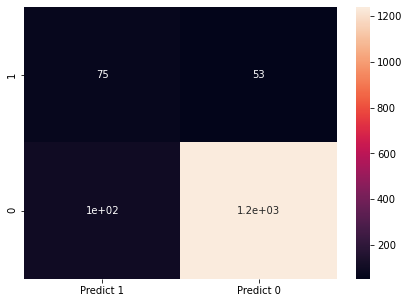

In [212]:
print ("Confusion Matrix")

cm=metrics.confusion_matrix(y_test1, Personal_Loan_Test_Predict, labels=[1,0])

df_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],
                  columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)

In [213]:
#THE CONFUSION MATRIX FOR NAIVE BAIYES IS SHOWN AS ABOVE:
#TRUE POSITIVES (TP): THE MODEL CORRECTLY PREDICTED THAT 75 PEOPLE WILL AVAIL THE PERSONAL LOAN
#TRUE NEGATIVES (TN): THE MODEL CORRECTLY PREDICTED THAT 1200 PEOPLE WILL NOT AVAIL THE PERSONAL LOAN
#FALSE POSITIVE (FP): THE MODEL PREDICTED THAT 100 PEOPLE WILL AVAIL LOAN BUT THEY DID NOT - TYPE I ERROR
#FALSE NEGATIVE (FN): THE MODEL PREDICTED THAT 53 PEOPLE WILL NOT AVAIL THE LOAN BUT THEY DID END UP AVAILING THE PERSONAL LOAN - TYPE -II ERROR ( MORE IMPORTANT IN THIS CASE)

In [214]:
#EVALUATION OF THE NAIVE BAYES MODEL
print("Classification Report")
print (metrics.classification_report(y_test1, Personal_Loan_Test_Predict,labels=[1,0]))

Classification Report
              precision    recall  f1-score   support

           1       0.42      0.59      0.49       128
           0       0.96      0.92      0.94      1341

    accuracy                           0.89      1469
   macro avg       0.69      0.75      0.72      1469
weighted avg       0.91      0.89      0.90      1469



In [215]:
# AS CAN BE SEEN ABOVE THE PRECISION IS ABOUT 42% AND RECALL IS ABOUT 59%
# WHICH MEANS THAT OUT OF 100 POSITIVE IDENTITIFICATION, WE CAN BE SURE THAT 42 TIMES WE GOT THE RIGHT PERSON WHO CAN AVAIL THE LOAN
# NOW WE ARE ABOUT 59% ACCURATE IN IDENTIFYING THE PEOPLE LIKELY IN AVAILING THE LOAN.
# SUPPORT IS 128 WHICH MEANS , 128 PEOPLE ARE LIKELY TO AVAIL THE PERSONAL LOAN, HERE WE ARE SEEING THAT RECALL SCORE HAS INCREASED
# AT THE EXPENSE OF PRECISION, SO WE SEE THAT FALSE NEGATIVES HAVE GONE DOWN WHICH IS MORE IMPORTANT.

# kNN MODEL

In [216]:
from sklearn.model_selection import train_test_split
X=pdata4.drop('Personal Loan',axis=1) # Dropping the dependent variable and keeping all the 
Y= pdata4['Personal Loan'] # PREDICTED CLASS (1= LOAN AVAILED AND 0= LOAN NOT AVAILED)
x_train2,x_test2,y_train2,y_test2=train_test_split(X,Y, test_size=0.3,random_state=1)
x_train2.head(10)
y_train2.head(10)

3402    0
4688    0
4505    0
2238    0
3       0
4974    0
3004    0
7       0
3249    0
2580    0
Name: Personal Loan, dtype: int64

In [217]:
#BUILD kNN MODEL
from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=5, weights ='distance')

In [218]:
# CALL NEAREST NEIGHBOR ALGORITHM
NNH.fit(x_train2,y_train2)

KNeighborsClassifier(weights='distance')

In [219]:
#EVALUATE THE PERFORMANCE OF kNN MODEL-test data

In [220]:
Personal_Loan_Test_Predict2=NNH.predict(x_test2)
NNH.score(x_test2,y_test2)

0.9162695711368277

In [221]:
#EVALUATE THE PERFORMANCE OF kNN MODEL-train data , since it is 1 looks like some overfittig is happening

In [222]:
Loan_Predict2=NNH.predict(x_train2)
NNH.score(x_train2,y_train2)

1.0

# CONFUSION MATRIX - kNN ALGORITHM

Confusion Matrix


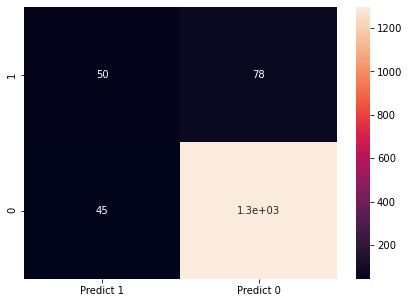

In [223]:
print ("Confusion Matrix")

cm=metrics.confusion_matrix(y_test2, Personal_Loan_Test_Predict2, labels=[1,0])

df_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],
                  columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)

In [224]:
#THE CONFUSION MATRIX FOR kNN IS SHOWN AS ABOVE:
#TRUE POSITIVES (TP): THE MODEL CORRECTLY PREDICTED THAT 50 PEOPLE WILL AVAIL THE PERSONAL LOAN
#TRUE NEGATIVES (TN): THE MODEL CORRECTLY PREDICTED THAT 1300 PEOPLE WILL NOT AVAIL THE PERSONAL LOAN
#FALSE POSITIVE (FP): THE MODEL PREDICTED THAT 45 PEOPLE WILL AVAIL LOAN BUT THEY DID NOT - TYPE I ERROR
#FALSE NEGATIVE (FN): THE MODEL PREDICTED THAT 78 PEOPLE WILL NOT AVAIL THE LOAN BUT THEY DID END UP AVAILING THE PERSONAL LOAN - TYPE -II ERROR ( MORE IMPORTANT IN THIS CASE)

In [225]:
#EVALUATION OF THE kNN MODEL
print("Classification Report")
print (metrics.classification_report(y_test2, Personal_Loan_Test_Predict2,labels=[1,0]))

Classification Report
              precision    recall  f1-score   support

           1       0.53      0.39      0.45       128
           0       0.94      0.97      0.95      1341

    accuracy                           0.92      1469
   macro avg       0.73      0.68      0.70      1469
weighted avg       0.91      0.92      0.91      1469



In [226]:
# AS CAN BE SEEN ABOVE THE PRECISION IS ABOUT 53% AND RECALL IS ABOUT 39%
# WHICH MEANS THAT OUT OF 100 POSITIVE IDENTITIFICATION, WE CAN BE SURE THAT 53 TIMES WE GOT THE RIGHT PERSON WHO CAN AVAIL THE LOAN
# NOW WE ARE ABOUT 39% ACCURATE IN IDENTIFYING THE PEOPLE LIKELY IN AVAILING THE LOAN.
# SUPPORT IS 128 WHICH MEANS , 128 PEOPLE ARE LIKELY TO AVAIL THE PERSONAL LOAN, HERE WE ARE SEEING THAT RECALL SCORE HAS DECREASED
# AT THE EXPENSE OF PRECISION, SO WE SEE THAT FALSE NEGATIVES HAVE GONE DOWN WHICH IS MORE IMPORTANT.

# STEP 7 : Give your reasoning on which is the best model in this case and why it performs better? (5 marks)

In [227]:
# let us us summarize our findings:
#MODEL SCORE OF THE MODELS
#1.) LOGISTIC REGRESSION - 95% ----HIGHEST 
#2.) NAIVE BAYES - 89%
#3.) kNN - 92%

# BUT THE DECISION HERE CANNOT BE BASED ONLY ON THE ACCURACY ALONE AS WE NEED TO UNDERSTAND WHICH PARAMETER SHOULD BE CHOSEN FOR EVLAUAITON

# LET US LOOK AT PRECISION VALUE HERE
#1.) LOGISTIC REGRESSION - 81%--- HIGHEST 
#2.) NAIVE BAYES - 42%
#3.) kNN - 53%
# PRECISION GIVES US AN IDEA OF WHAT PROPORTIONS OF POSITIVE IDENTIFICATIONS WERE CORRECT 

# LET US LOOK AT RECALL VALUE HERE
#1.) LOGISTIC REGRESSION - 52%
#2.) NAIVE BAYES - 59% -- HIGHEST 
#3.) kNN - 39%
 # RECALL HERE IS AN IMPORTANT MEASURE OF WHAT PROPORTIONS OF POSITIVES WERE IDENTIFIED CORRECTLY ?
# AND IN THIS CASE IT IS IMPORTANT FOR US TO MEASURE THIS AS WE CANNOT AFFORD TO LET GO OF PEOPLE WHO 
# WOULD HAVE AVAILED LOAN BUT WERE NOT IDENTIFIED POSITIVELY.

# ONE FINAL PARAMETER WE WILL LOOK AT IS THE NUMBER OF TRUE POSITIVES OR THE NUMBER OF POSITIVES :
#1.) LOGISTIC REGRESSION - 66 TRUE POSITIVE CASES WERE IDENTIFIED
#2.) NAIVE BAYES - 75 TRUE POSITIVE CASES WERE IDENTIFIED
#3.) kNN - 50 TRUE POSITIVE CASES WERE IDENTIFIED

# BASED ON THE RESULTS SUMMARY ABOVE WE CAN SEE THAT EVEN THOUGH THE MODEL ACCURACY SCORE IS MORE IN LOGISTIC REGRESSION, 
# THE NUMBER OF TRUE POSITIVE CASES AND RECALL RATE IS HIGHEST IN NAIVE BAYES APPROACH....
# IN THIS CASES WE NEED TO PAY MORE ATTENTION TO RECALL RATE AS WE CANNOT AFFORD TO NEGATIVELY IDENTIFY CUSTOMERS 
# WHO WOULD HAVE AVAILED THE PERSONAL LOAN

#  # SO BASED ON RECALL RATE AND TRUE POSITIVE IDENTIFICATION NAIVE BAYES IS THE BEST MODEL TO PREDICT